In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

In [0]:
file_deplacement ="/content/drive/My Drive/Colab Notebooks/stage2019_improvement/data_egt/Deplacements_semaine.csv"

In [3]:
deplacement=pd.read_csv(file_deplacement,delimiter=',',encoding='iso 8859-1')
deplacement

,NQUEST,NP,ND,POIDSP,JDEP,RESCOUR,RESDEP,RESSECT,RESCOMM,RESC,ORCOUR,ORDEP,ORSECT,ORCOMM,ORC,ORH,ORM,ORMOT,ORMOT_H9,DESTCOUR,DESTDEP,DESTSECT,DESTCOMM,DESTC,DESTH,DESTM,DESTMOT,DESTMOT_H9,DESTMOT_IAURIF02,MOTIF_COMBINE,DPORTEE,DUREE,ACCMOT,ACCMOT_H9,ACCNP,TLT,TLA,NBAT,TRP,MODP_STRICT,MODP_H6,MODP_H7,MODP_H12,MODP_H19,NBTRAJ,NBTRAJVP,NBTRAJVPC,NBTRAJTC,NBTRAJVELO,NBTRAJ2RM,IDM,NBCO,RAB_TC,DIFF_TC
0,75010021,1,1,180.391709,2,1,75,7501,75102,555522C,1.0,75,7501.0,75102,555522C,10.0,0.0,1,1.0,1.0,75,7503.0,75109,555281I,10.0,30.0,55,6.0,6.0,4.0,0.76,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,1,4,5,3,NaN,NaN,1.0,NaN,NaN,1,0.0,1.0,1.0
1,75010021,1,2,180.391709,2,1,75,7501,75102,555522C,1.0,75,7503.0,75109,555281I,11.0,0.0,55,6.0,1.0,75,7501.0,75102,555522C,11.0,30.0,1,1.0,7.0,4.0,0.76,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,6,7,12,19,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,75010021,1,3,180.391709,2,1,75,7501,75102,555522C,1.0,75,7501.0,75102,555522C,12.0,0.0,1,1.0,1.0,75,7501.0,75102,555526A,12.0,15.0,31,5.0,5.0,3.0,0.32,15.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,41,6,7,12,19,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,75010021,1,4,180.391709,2,1,75,7501,75102,555522C,1.0,75,7501.0,75102,555526A,12.0,30.0,31,5.0,1.0,75,7501.0,75102,555522C,12.0,35.0,1,1.0,7.0,3.0,0.32,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,6,7,12,19,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,75010021,1,5,180.391709,2,1,75,7501,75102,555522C,1.0,75,7501.0,75102,555522C,16.0,0.0,1,1.0,1.0,75,7504.0,75110,555295C,16.0,20.0,55,6.0,6.0,4.0,1.08,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2,3,3,NaN,NaN,1.0,NaN,NaN,1,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124257,95139161,3,4,224.618104,1,3,95,9513,95102,512529G,1.0,75,7510.0,75116,554631F,23.0,30.0,44,8.0,1.0,75,7508.0,75114,555851I,24.0,0.0,43,8.0,4.0,9.0,5.83,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2,3,3,NaN,NaN,1.0,NaN,NaN,1,0.0,1.0,1.0
124258,95139161,4,1,172.379084,1,3,95,9513,95102,512529G,3.0,95,9513.0,95102,512529G,7.0,50.0,1,1.0,3.0,95,9502.0,95500,516762D,8.0,10.0,22,4.0,3.0,2.0,12.53,20.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,25,2,3,7,15,3,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
124259,95139161,4,2,172.379084,1,3,95,9513,95102,512529G,3.0,95,9502.0,95500,516762D,18.0,0.0,22,4.0,3.0,95,9513.0,95102,512529G,18.0,30.0,1,1.0,7.0,2.0,12.53,30.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,25,2,3,7,15,3,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
124260,95139171,1,1,95.230203,1,3,95,9513,95039,516684B,3.0,95,9513.0,95039,516684B,15.0,30.0,1,1.0,3.0,95,9513.0,95039,516688B,16.0,0.0,42,8.0,4.0,6.0,0.42,30.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,41,6,7,12,19,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [59]:
dict_type={}
for index,row in deplacement.iterrows():
  if np.isnan(row['RAB_TC']):
    dict_type["not"] = dict_type.get("not",0)+1
  else:
    dict_type[row['RAB_TC']]=dict_type.get(row['RAB_TC'],0)+1
  print(index/len(deplacement))

Streaming output truncated to the last 5000 lines.
0.9597704849431041
0.959778532455618
0.9597865799681319
0.9597946274806457
0.9598026749931596
0.9598107225056735
0.9598187700181874
0.9598268175307013
0.9598348650432151
0.9598429125557291
0.9598509600682429
0.9598590075807568
0.9598670550932706
0.9598751026057846
0.9598831501182984
0.9598911976308123
0.9598992451433263
0.9599072926558401
0.959915340168354
0.9599233876808678
0.9599314351933818
0.9599394827058956
0.9599475302184095
0.9599555777309233
0.9599636252434373
0.9599716727559512
0.959979720268465
0.9599877677809789
0.9599958152934928
0.9600038628060067
0.9600119103185205
0.9600199578310344
0.9600280053435483
0.9600360528560622
0.9600441003685761
0.96005214788109
0.9600601953936039
0.9600682429061177
0.9600762904186316
0.9600843379311454
0.9600923854436594
0.9601004329561732
0.9601084804686871
0.9601165279812011
0.9601245754937149
0.9601326230062288
0.9601406705187426
0.9601487180312566
0.9601567655437704
0.9601648130562843
0.96

In [60]:
dict_type

{1.0: 22232,
 35.0: 3,
 40.0: 4,
 41.0: 56,
 42.0: 28,
 43.0: 30,
 50.0: 588,
 53.0: 1,
 54.0: 3,
 55.0: 3,
 60.0: 27,
 61.0: 11,
 62.0: 61,
 63.0: 1,
 70.0: 408,
 71.0: 5,
 72.0: 8,
 73.0: 1,
 75.0: 5,
 81.0: 9,
 82.0: 3,
 'not': 100775}

In [0]:
dict_type_summury = {}
dict_type_summury["Others"]=dict_type["not"]
dict_type_summury["Public Transport"] = dict_type[1.0]
dict_type_summury["Intermodality"]=sum(dict_type.values())-dict_type[1.0]-dict_type["not"]

Text(0.5, 1.0, 'EGT OD Trip composition')

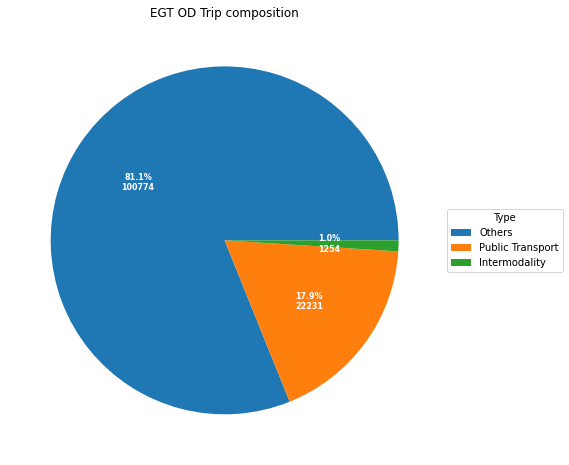

In [89]:


import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))


data = list(dict_type_summury.values())
ingredients =list(dict_type_summury.keys())


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("EGT OD Trip composition")
